In [209]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [210]:
data=pd.read_csv('data/train.csv')

In [211]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

In [213]:
#Splitting Data
data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255.

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.


In [214]:
def init_params():
    """
    W1 -- weight matrix of shape (size of the hidden layer, size of the input layer)
    b1 -- bias vector of shape (size of the hidden layer, 1)
    W2 -- weight matrix of shape (size of the output layer, size of the hidden layer)
    b2 -- bias vector of shape (size of the output layer, 1)
    """    
    W1 = np.random.rand(200, 784) - 0.5
    b1 = np.random.rand(200, 1) - 0.5
    W2 = np.random.rand(100, 200) - 0.5
    b2 = np.random.rand(100, 1) - 0.5
    W3 = np.random.rand(10, 100) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2,W3,b3

In [215]:
def ReLU(Z):
    return np.maximum(0,Z)
def deriv_ReLU(Z):
    return Z>0
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def forward_prop(W1,b1,W2,b2,W3,b3,X):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    return Z1,A1,Z2,A2,Z3,A3

In [216]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def backward_prop(Z1,Z2,Z3,A1,A2,A3,W1,W2,W3,X,Y):
    one_hot_Y=one_hot(Y)
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ3= A3 - one_hot_Y
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.multiply(np.dot(W3.T, dZ3), deriv_ReLU(Z2))
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), deriv_ReLU(Z1))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1,db1,dW2,db2,dW3,db3

In [217]:
def update_params(W1, b1, W2, b2, W3,b3, dW1, db1, dW2, db2,dW3,db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2   
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3    
    return W1, b1, W2, b2,W3,b3

In [218]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
pts=[]
def gradient_descent(X,Y,alpha,iterations):
    W1, b1, W2, b2,W3,b3=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2,Z3,A3=forward_prop(W1,b1,W2,b2,W3,b3,X)
        dW1, db1, dW2, db2,dW3,db3=backward_prop(Z1,Z2,Z3,A1,A2,A3,W1,W2,W3,X,Y)
        W1, b1, W2, b2,W3,b3=update_params(W1, b1, W2, b2,W3,b3, dW1, db1, dW2, db2,dW3,db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
            pts.append(get_accuracy(predictions, Y))
    return W1,b1,W2,b2,W3,b3


Iteration:  0
[0 0 6 ... 0 8 3] [2 5 5 ... 5 6 7]
0.09119512195121951
[0 0 6 ... 0 8 3] [2 5 5 ... 5 6 7]
Iteration:  10
[2 3 5 ... 5 6 9] [2 5 5 ... 5 6 7]
0.547439024390244
[2 3 5 ... 5 6 9] [2 5 5 ... 5 6 7]
Iteration:  20
[2 3 5 ... 5 6 9] [2 5 5 ... 5 6 7]
0.704390243902439
[2 3 5 ... 5 6 9] [2 5 5 ... 5 6 7]
Iteration:  30
[2 3 5 ... 5 6 9] [2 5 5 ... 5 6 7]
0.762609756097561
[2 3 5 ... 5 6 9] [2 5 5 ... 5 6 7]
Iteration:  40
[2 3 5 ... 5 6 9] [2 5 5 ... 5 6 7]
0.7950731707317074
[2 3 5 ... 5 6 9] [2 5 5 ... 5 6 7]
Iteration:  50
[2 3 5 ... 5 6 7] [2 5 5 ... 5 6 7]
0.8166829268292682
[2 3 5 ... 5 6 7] [2 5 5 ... 5 6 7]
Iteration:  60
[2 3 5 ... 8 6 7] [2 5 5 ... 5 6 7]
0.8336097560975609
[2 3 5 ... 8 6 7] [2 5 5 ... 5 6 7]
Iteration:  70
[2 3 5 ... 8 6 7] [2 5 5 ... 5 6 7]
0.8461463414634146
[2 3 5 ... 8 6 7] [2 5 5 ... 5 6 7]
Iteration:  80
[2 3 5 ... 8 6 7] [2 5 5 ... 5 6 7]
0.8562195121951219
[2 3 5 ... 8 6 7] [2 5 5 ... 5 6 7]
Iteration:  90
[2 8 5 ... 8 6 7] [2 5 5 ... 5 6 7

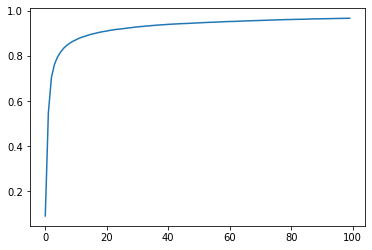

In [219]:
W1, b1, W2, b2,W3,b3 = gradient_descent(X_train, Y_train, 0.25, 1000)
plt.plot(pts)
plt.show()

In [220]:
def make_predictions(X, W1, b1, W2, b2,W3,b3):
    _, _, _,_,_, A3 = forward_prop(W1, b1, W2, b2,W3,b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2,W3,b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2,W3,b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
print("accuracy=",pts[len(pts)-1]*100,'%')


accuracy= 96.60243902439024 %


Prediction:  [2]
Label:  2


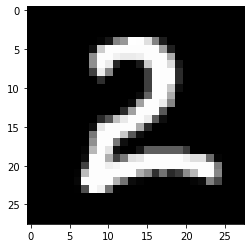

In [221]:
test_prediction(0, W1, b1, W2, b2,W3,b3)